### Regression model V19
prep V 11 has new feature avg prior late arrival 
try gradient boosted regressor (see cell 14)

In [1]:
fileprefix='./lateness_PREP_V11_'

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_X=pd.read_csv(fileprefix+'X.csv', sep='\t')

In [4]:
df_X.shape

(125675, 216)

In [5]:
df_y=pd.read_csv(fileprefix+'y.csv', sep='\t', header=None)

In [6]:
type(df_y)
df_y.shape

(125675, 2)

In [37]:
df_y.head()

,0,1
0,5,-497.0
1,6,5.0
2,7,-313.0
3,8,-296.0
4,9,-166.0


In [8]:
y=df_y[1]
y.head()

0   -497.0
1      5.0
2   -313.0
3   -296.0
4   -166.0
Name: 1, dtype: float64

In [9]:
y.shape

(125675,)

In [10]:
df_X.head()

,Unnamed: 0,claimed_at_pdt_hour_4,claimed_at_pdt_hour_13,lead_organizer_created_at_pdt_hour,origin_region_name_San Francisco,created_at_pdt_month,destination_lat,origin_region_name_Orange County - North,created_at_pdt_weekday,driver_signup_before_trip_created_secs,...,scheduled_starts_at_pdt_hour_10,driver_previous_completed_trips,claimed_at_pdt_hour_1,lead_organizer_created_at_pdt_weekofyear,scheduled_starts_at_pdt_hour_12,origin_analysis_metro_name_LA,shuttle_int,lead_organizer_created_at_pdt_dayofyear,scheduled_starts_at_pdt_dayofyear,lead_organizer_platform_ios
0,5,0,0,19,0,2,34.18,0,6,18685416.0,...,0,663.0,0,26,0,1,0,185,45,1
1,6,0,0,19,0,1,34.10,0,3,16613901.0,...,0,634.0,0,26,0,1,0,185,24,1
2,7,0,0,20,0,2,34.16,0,6,18684204.0,...,0,649.0,0,26,0,1,0,185,39,1
3,8,0,0,20,0,1,34.17,0,2,17715744.0,...,0,637.0,0,26,0,1,0,185,26,1
4,9,0,0,19,0,10,34.12,0,0,7851048.0,...,0,629.0,0,26,0,1,0,185,23,1


In [11]:
y.describe().round()

count    125675.0
mean       -416.0
std         509.0
min       -1800.0
25%        -657.0
50%        -324.0
75%         -96.0
max        1800.0
Name: 1, dtype: float64

In [12]:
# break df_X,y into test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.20, random_state=808)

In [13]:
for i in X_train, X_test, y_train, y_test:
    print(i.shape)

(100540, 216)
(25135, 216)
(100540,)
(25135,)


In [14]:
# select a regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(max_depth=4, random_state=808, n_estimators=200)

In [15]:
# fit model
model=model.fit(X_train,y_train)

In [16]:
print(model.feature_importances_)

[1.78644517e-02 4.90139475e-04 1.89679446e-03 4.95982258e-03
 0.00000000e+00 6.16081653e-05 1.07851849e-02 0.00000000e+00
 1.07082591e-03 1.54254138e-02 0.00000000e+00 6.51418857e-04
 0.00000000e+00 1.19692972e-03 1.91165747e-03 0.00000000e+00
 3.04428028e-04 4.18482230e-03 4.15630074e-04 2.54121416e-03
 0.00000000e+00 5.01483897e-05 1.54066012e-04 0.00000000e+00
 4.15251283e-04 1.26115883e-02 2.08080759e-05 3.48820467e-02
 4.78938688e-02 8.36075292e-04 0.00000000e+00 0.00000000e+00
 3.28384406e-03 7.28246026e-03 6.10892945e-03 0.00000000e+00
 1.09856367e-03 0.00000000e+00 0.00000000e+00 1.27181759e-02
 1.46798471e-02 1.61604468e-03 0.00000000e+00 1.44550544e-02
 6.81900387e-04 1.01786669e-03 2.30761370e-04 1.65136514e-03
 3.50960063e-03 3.03125746e-04 5.64902394e-05 0.00000000e+00
 0.00000000e+00 1.73205079e-01 5.24575429e-04 0.00000000e+00
 9.92686779e-03 1.72719246e-02 2.49771372e-03 1.36681671e-02
 0.00000000e+00 9.94062125e-04 8.16057081e-03 4.79931085e-03
 1.54912945e-02 0.000000

In [17]:
importances = list(zip(model.feature_importances_, X_train.columns))
importances.sort(reverse=True)
importances

[(0.17320507852071393, 'avg_prior_arrived_late_seconds'),
 (0.04789386881895214, 'claimed_before_trip_start_secs'),
 (0.03529646369737171, 'origin_location_id'),
 (0.03488574199261876, 'driver_previous_completed_trips'),
 (0.03488204669324041, 'driver_home_lon'),
 (0.0333310119660214, 'driver_home_lat'),
 (0.033309202658305635, 'driver_id'),
 (0.024951037796717417, 'scheduled_starts_at_pdt_hour'),
 (0.023361286096700802, 'driver_created_at_pdt_dayofyear'),
 (0.022689174438655244, 'destination_location_id'),
 (0.022292254225859665, 'origin_lon'),
 (0.017864451665380962, 'Unnamed: 0'),
 (0.01727192463683992, 'trip_created_before_trip_start_secs'),
 (0.015491294476992728, 'driver_created_at_pdt_day'),
 (0.015425413842162087, 'driver_signup_before_trip_created_secs'),
 (0.014679847129552004, 'lead_organizer_previous_completed_trips'),
 (0.01445505440928096, 'driver_signup_before_org_signup_secs'),
 (0.0136681671240135, 'predicted_driver_fare'),
 (0.012974900425814655, 'trip_predicted_raw_f

In [18]:
# top 10 importances
dict(importances[:10]).values()


dict_values(['avg_prior_arrived_late_seconds', 'claimed_before_trip_start_secs', 'origin_location_id', 'driver_previous_completed_trips', 'driver_home_lon', 'driver_home_lat', 'driver_id', 'scheduled_starts_at_pdt_hour', 'driver_created_at_pdt_dayofyear', 'destination_location_id'])

In [19]:
# number of non-zero features used
len([(i,f) for i, f in importances if i > 0])

157

In [20]:
# number of features with importance above 1%
len([(i,f) for i, f in importances if i > 0.01])

28

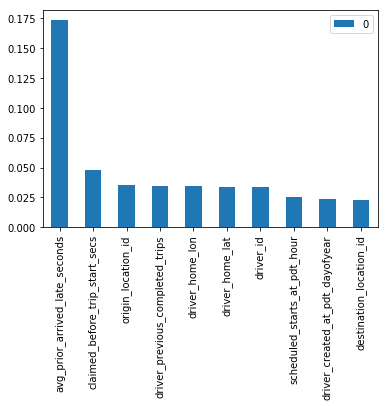

In [36]:
pd.DataFrame(importances[:10], index=[x for (_,x) in importances[:10] ]).plot(kind = 'bar')

In [22]:
# score against TRAINING set
model.score(X_train,y_train)

0.2888052267156406

In [23]:
# score against TEST set
model.score(X_test,y_test)

0.2585993184978693

In [24]:
model_y_test_pred = model.predict(X_test)
model_y_test_pred.size

25135

In [25]:
type(model_y_test_pred)

numpy.ndarray

In [26]:
model_y_test_pred[:10]

array([-114.95344448, -197.87626334, -815.34333596, -345.67755176,
       -284.60035075, -284.06412118, -255.5459281 , -432.15729758,
       -849.20471326, -336.15643824])

In [27]:
pd.Series(model_y_test_pred).std()

256.8197513172395

In [28]:
pd.Series(model_y_test_pred).corr(y_test)

-0.011136453145618811

In [29]:
# regression metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from math import sqrt
print ("%.3f %.2f %.0f %.3f %.0f %.0f %.2f" % 
       (explained_variance_score(y_test, model_y_test_pred),
        sqrt(mean_squared_error(y_test, model_y_test_pred))/60, # sqrt of MSE in minutes
        mean_squared_error(y_test, model_y_test_pred), 
        r2_score(y_test, model_y_test_pred), 
        mean_absolute_error(y_test, model_y_test_pred), 
        median_absolute_error(y_test, model_y_test_pred),
        median_absolute_error(y_test, model_y_test_pred)/60 # MAE in minutes
       ))

0.259 7.35 194564 0.259 321 232 3.87


In [30]:
# make classifications from seconds late target
bins = np.array([0.0, 5*60, 15*60]) # 0 on-time, 1 almost on-time, 2 late, 3 extremely late
bins

array([  0., 300., 900.])

In [31]:
np.digitize(y_test, bins)[:10]

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [32]:
# materialize y_test_class array
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
y_test_class=np.digitize(y_test, bins)
unique, counts = np.unique(y_test_class, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0 21156]
 [    1  2939]
 [    2   892]
 [    3   148]]


In [33]:
# materialize model_y_pred_class
# check to see how many trips are categorized as 0 on-time, 1 almost on-time, 2 late, 3 extremely late
model_y_test_pred_class=np.digitize(model_y_test_pred, bins)
print(np.asarray(np.unique(model_y_test_pred_class, return_counts=True)).T)

[[    0 24822]
 [    1   245]
 [    2    54]
 [    3    14]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class,model_y_test_pred_class))

             precision    recall  f1-score   support

          0       0.85      0.99      0.92     21156
          1       0.43      0.04      0.07      2939
          2       0.41      0.02      0.05       892
          3       0.50      0.05      0.09       148

avg / total       0.78      0.84      0.78     25135



In [35]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_class,model_y_test_pred_class,labels=[0,1,2,3]))

[[21041   106     8     1]
 [ 2820   105    11     3]
 [  843    24    22     3]
 [  118    10    13     7]]
